# Классификация текстов

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import numpy as np
from sklearn.model_selection import learning_curve
from matplotlib import pyplot as plt

### 1. Загрузите датасет 20 newsgroups;

In [ ]:
news = fetch_20newsgroups(subset='all')

### 3. Выведите информацию о количественных параметрах датасета;

In [ ]:
print(news.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality

### 4. Выведите несколько точек датасета (сами текстовые фрагменты и значение целевой переменной);

In [ ]:
for i in range(4):
    print(news.data[i], '\n', news.target[i], '\n----\n')

From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!

 
 10 
----

From: mblawson@midway.ecn.uoknor.edu (Matthew B Lawson)
Subject: Which high-performan

### 5. Разделите эти данные на тестовую и обучающую выборки;

In [ ]:
newsTrain = fetch_20newsgroups(subset = 'train')
newsTest = fetch_20newsgroups(subset = 'test')

### 6. Постройте модель наивного байесовского для классификации текстов;

In [ ]:
# векторизуем данные
vectorizer = CountVectorizer()
newsTrainVectorized = vectorizer.fit_transform(newsTrain.data)
newsTestVectorized =  vectorizer.transform(newsTest.data)

model = MultinomialNB(alpha = .01) # строим модель наивного байесовского для классификации текстов
model.fit(newsTrainVectorized, newsTrain.target) # обучаем модель

MultinomialNB(alpha=0.01)

### 7. Оцените качество модели на тестовой выборке с помощью следующих метрик:
##### a. достоверность предсказания (accuracy);
##### b. точность (precision);
##### c. полнота (recall);

In [ ]:
print(metrics.classification_report(newsTest.target, model.predict(newsTestVectorized)))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       319
           1       0.57      0.78      0.66       389
           2       0.75      0.04      0.07       394
           3       0.55      0.78      0.64       392
           4       0.74      0.83      0.78       385
           5       0.80      0.73      0.76       395
           6       0.79      0.85      0.82       390
           7       0.86      0.90      0.88       396
           8       0.91      0.96      0.94       398
           9       0.95      0.93      0.94       397
          10       0.96      0.96      0.96       399
          11       0.88      0.93      0.91       396
          12       0.77      0.76      0.76       393
          13       0.88      0.83      0.86       396
          14       0.87      0.89      0.88       394
          15       0.89      0.92      0.91       398
          16       0.80      0.89      0.84       364
          17       0.97    

Достоверность предсказания (accuracy) -> 0.79

Точность (precision) -> 0.81

Полнота (recall) -> 0.80

In [ ]:
print("F1 macro-average ->", metrics.f1_score(newsTest.target, newsTestVectorized, average='macro'))
print("F1 micro-average ->", metrics.f1_score(newsTest.target, newsTestVectorized, average='micro'))

Разница между micro и macro методами заключается в подсчете:
- в 1м случае идет подсчет общего количества верных и неверных предсказаний
- а во 2м показателей для каждого класса независимо считаются и вычисляется их невзвешенное среднее

### 8. Постройте кривую обучения - график зависимости тестовой и обучающей эффективности от размера обучающей выборки.

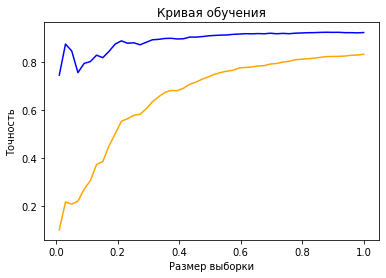

In [50]:
# построение кривой обучения
train_size, train_scores, validation_scores = learning_curve(MultinomialNB(), newsTrainVectorized, newsTrain.target, train_sizes = np.linspace(0.01, 1.0, 50), cv = 5)

# отрисовка кривой обучения
plt.figure()
plt.plot(size_grid, np.average(train_scores, axis = 1), color = 'blue')
plt.plot(size_grid, np.average(validation_scores, axis = 1), color = 'orange')
plt.title('Кривая обучения')
plt.xlabel('Размер выборки')
plt.ylabel('Точность')
plt.show()

### 9. Сделайте вывод о применимости модели.

Судя по кривой обучения и метрикам точность классификации составляет 80%, следовательно модель можно применять.